#### This makes functions that plots sliceplots for a given list of ions using matplotlib as opposed to yt. It accounts for all ions; even if they are not part of the trident lines.

In [1]:
import chollaread
import numpy as np
import yt
import trident
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap, plasma
import matplotlib.animation as anim

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [3]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/146.h5',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2021-12-26 20:32:37,651 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-12-26 20:32:37,652 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2021-12-26 20:32:37,652 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-12-26 20:32:37,654 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2021-12-26 20:32:37,657 Parameters: cosmological_simulation   = 0.0


In [8]:
ds.derived_field_list

[('gas', 'C_p3_density'),
 ('gas', 'C_p3_ion_fraction'),
 ('gas', 'C_p3_mass'),
 ('gas', 'C_p3_number_density'),
 ('gas', 'H_density'),
 ('gas', 'H_ion_fraction'),
 ('gas', 'H_mass'),
 ('gas', 'H_nuclei_density'),
 ('gas', 'H_number_density'),
 ('gas', 'H_p0_density'),
 ('gas', 'H_p0_ion_fraction'),
 ('gas', 'H_p0_mass'),
 ('gas', 'H_p0_number_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'O_density'),
 ('gas', 'O_ion_fraction'),
 ('gas', 'O_mass'),
 ('gas', 'O_number_density'),
 ('gas', 'O_p0_density'),
 ('gas', 'O_p0_ion_fraction'),
 ('gas', 'O_p0_mass'),
 ('gas', 'O_p0_number_density'),
 ('gas', 'Si_p3_density'),
 ('gas', 'Si_p3_ion_fraction'),
 ('gas', 'Si_p3_mass'),
 ('gas', 'Si_p3_number_density'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_veloc

In [60]:
def DIY_plots_xy(ion_list, ion_den, add_field=False, der_field=False):
    if add_field==True:
        trident.add_ion_fields(ds, ions=ion_list, ftype="gas")
    if der_field == True:
        print(ds.derived_field_list)
    if der_field==False:
        for i in range(len(ion_den)):
            p = np.array(ds.all_data()[ion_den[i]])
            a = p.reshape(512, 256, 256)

            get_cmap("cet_bmw")

            fig = plt.figure(figsize=(17,8))
            p1 = fig.add_subplot(1,1,1)
            p1.set_facecolor('black')
            ax_x = np.arange(513)*(20/512)-10
            ax_y = np.arange(257)*(20/512)-5

            plt.pcolormesh(ax_x, ax_y, a[:,:,128].T, cmap = "cet_bmw", norm=colors.LogNorm())

            cb = plt.colorbar(pad=0.02) 
            cb.set_label(label='Density (g/cm$^3$)', size=15)
            cb.ax.tick_params(labelsize='large')
            plt.clim(vmin=10**-41, vmax=10**-23)

            plt.title(ion_list[i], fontsize = 20)
            plt.xlabel('x (kpc)', fontsize = 15)
            plt.ylabel('y (kpc)', fontsize = 15)
            plt.show()

In [43]:
def DIY_plots_yz(ion_list, ion_den, x, add_field=False, der_field=False):
    if add_field==True:
        trident.add_ion_fields(ds, ions=ion_list, ftype="gas")
    if der_field == True:
        print(ds.derived_field_list)
    if der_field==False:
        for i in range(len(ion_den)):
            p = np.array(ds.all_data()[ion_den[i]])
            a = p.reshape(512, 256, 256)

            get_cmap("cet_bmw")

            fig = plt.figure(figsize=(10,8))
            p1 = fig.add_subplot(1,1,1)
            p1.set_facecolor('black')
            ax_y = np.arange(257)*(20/512)-5
            ax_z = np.arange(257)*(20/512)-5

            plt.pcolormesh(ax_y, ax_z, a[x,:,:].T, cmap = "cet_bmw", norm=colors.LogNorm())

            cb = plt.colorbar(pad=0.02) 
            cb.set_label(label='Density (g/cm$^3$)', size=15)
            cb.ax.tick_params(labelsize='large')
            plt.clim(vmin=10**-41, vmax=10**-23)

            plt.title(ion_list[i], fontsize = 20)
            plt.xlabel('y (kpc)', fontsize = 15)
            plt.ylabel('z (kpc)', fontsize = 15)
            plt.show()

In [81]:
def DIY_plots_xz(ion_list, ion_den, y, add_field=False, der_field=False):
    if add_field==True:
        trident.add_ion_fields(ds, ions=ion_list, ftype="gas")
    if der_field == True:
        print(ds.derived_field_list)
    if der_field==False:
        for i in range(len(ion_den)):
            p = np.array(ds.all_data()[ion_den[i]])
            a = p.reshape(512, 256, 256)

            get_cmap("cet_bmw")

            fig = plt.figure(figsize=(17,8))
            p1 = fig.add_subplot(1,1,1)
            p1.set_facecolor('black')
            ax_x = np.arange(513)*(20/512)-10
            ax_z = np.arange(257)*(20/512)-5

            plt.pcolormesh(ax_x, ax_z, a[:,y,:].T, cmap = "cet_bmw", norm=colors.LogNorm())

            cb = plt.colorbar(pad=0.02) 
            cb.set_label(label='Density (g/cm$^3$)', size=15)
            cb.ax.tick_params(labelsize='large')
            plt.clim(vmin=10**-41, vmax=10**-23)

            plt.title(ion_list[i], fontsize = 20)
            plt.xlabel('x (kpc)', fontsize = 15)
            plt.ylabel('z (kpc)', fontsize = 15)
            plt.show()

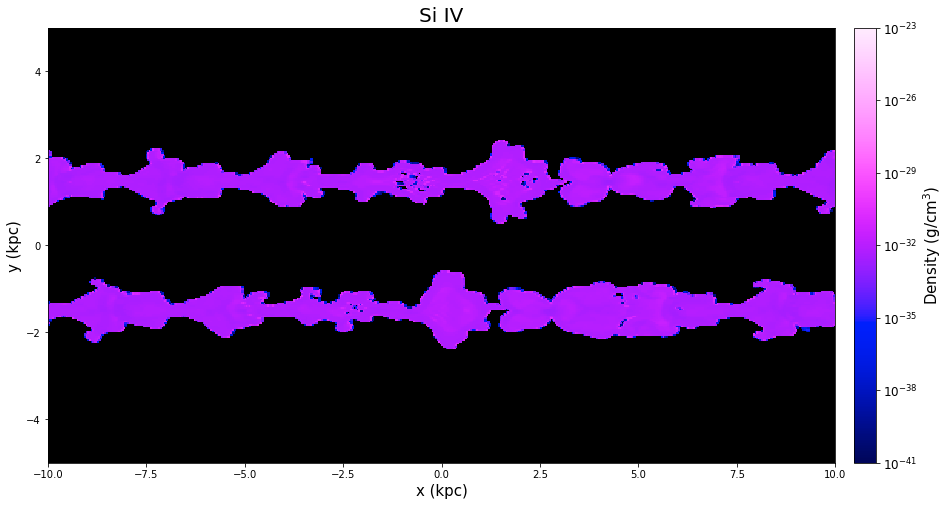

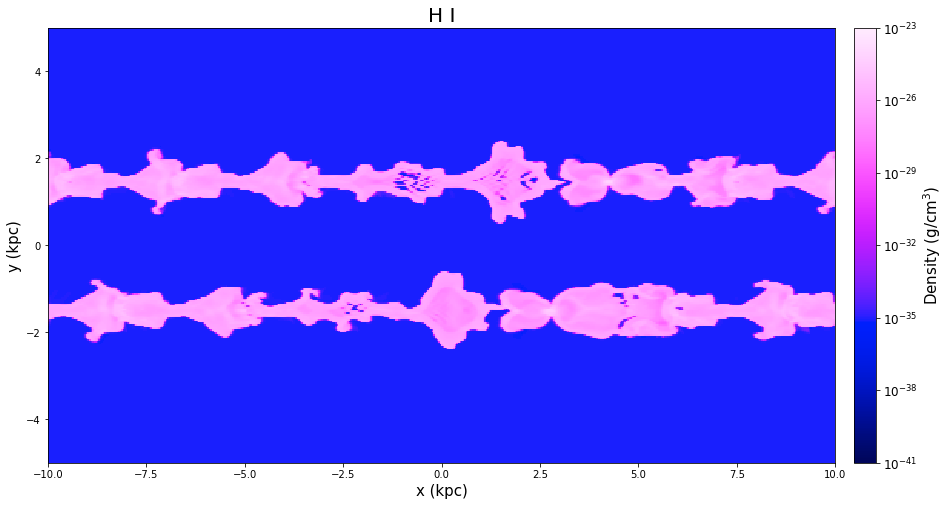

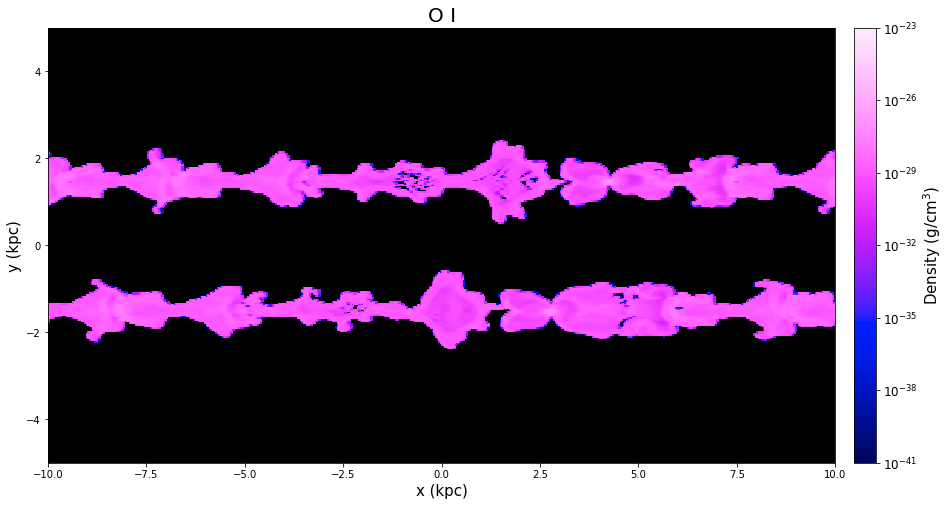

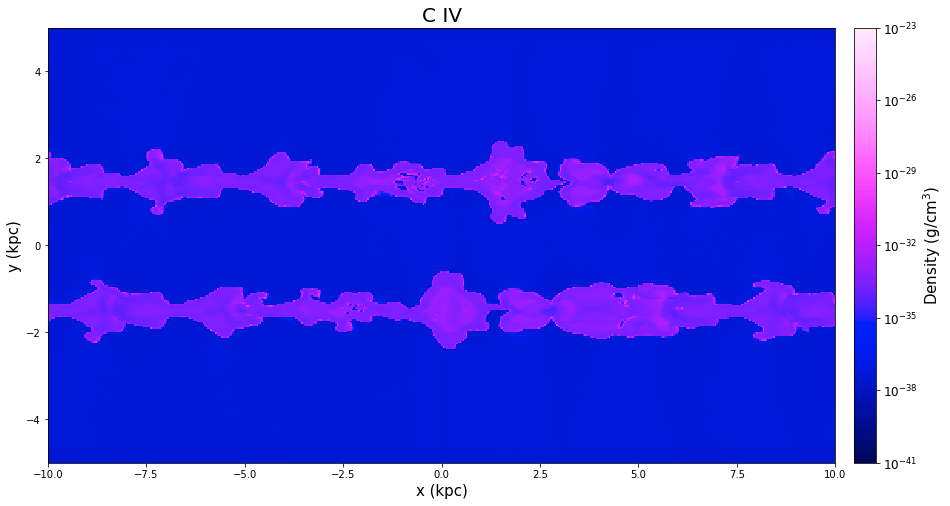

In [61]:
DIY_plots_xy(['Si IV', 'H I', 'O I', 'C IV'], 
             ['Si_p3_density', 'H_p0_density', 'O_p0_density', 'C_p3_density'], der_field=False)

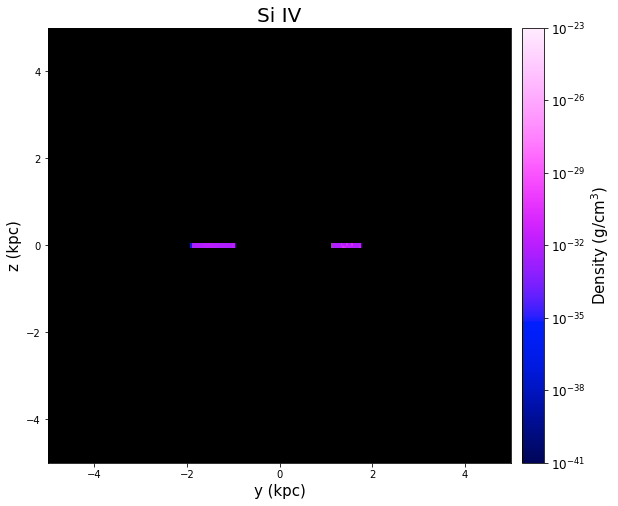

In [45]:
DIY_plots_yz(['Si IV'], 
             ['Si_p3_density'], 248,
             der_field=False)

#### It's not that yt sliceplots are wrong, they are just sliced somewhere where there is not a lot of gas along the x-direction

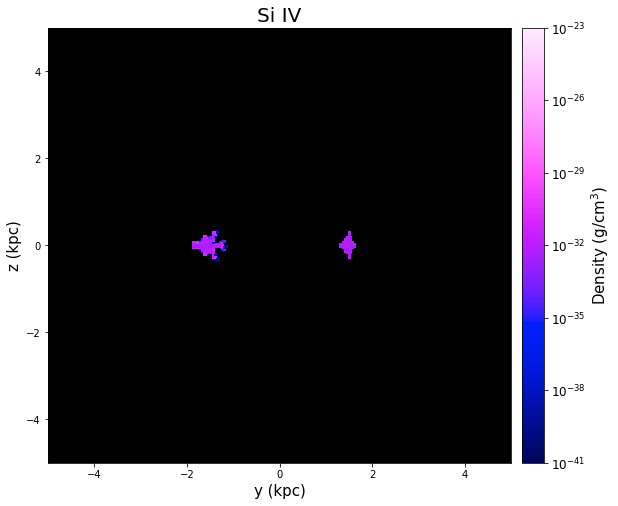

In [46]:
DIY_plots_yz(['Si IV'], 
             ['Si_p3_density'], 128,
             der_field=False)

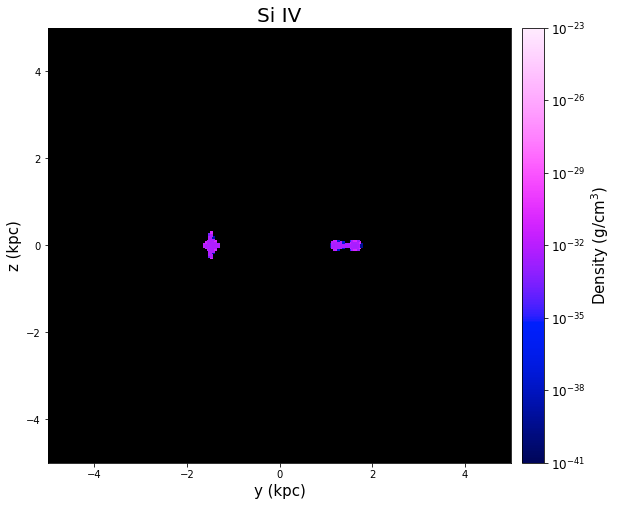

In [47]:
DIY_plots_yz(['Si IV'], 
             ['Si_p3_density'], 90,
             der_field=False)

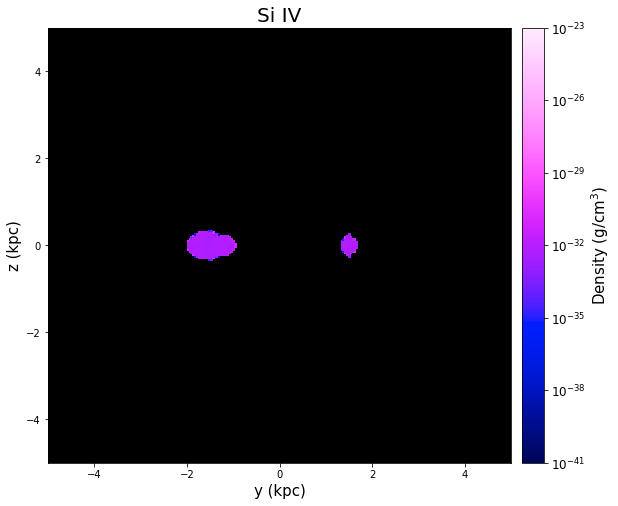

In [63]:
DIY_plots_yz(['Si IV'], 
             ['Si_p3_density'], 40,
             der_field=False)

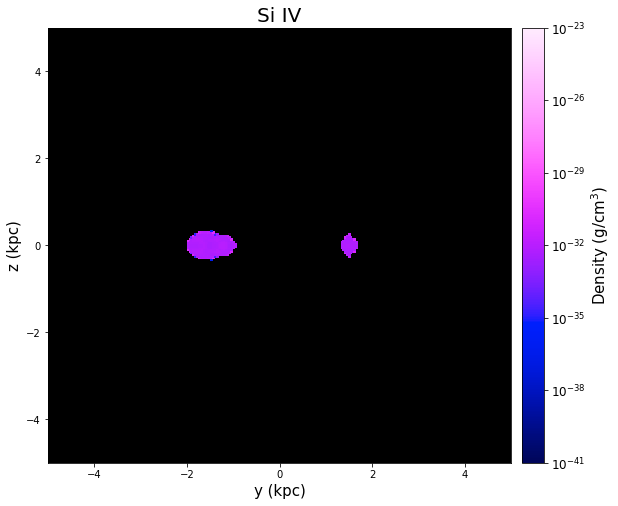

In [66]:
DIY_plots_yz(['Si IV'], 
             ['Si_p3_density'], 41,
             der_field=False)

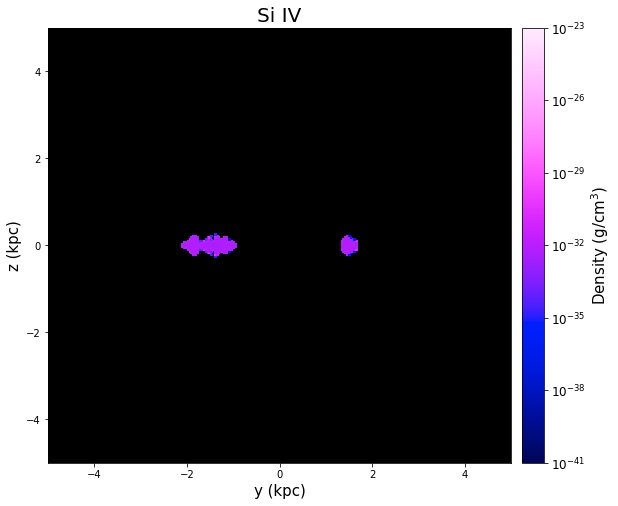

In [48]:
DIY_plots_yz(['Si IV'], 
             ['Si_p3_density'], 115,
             der_field=False)

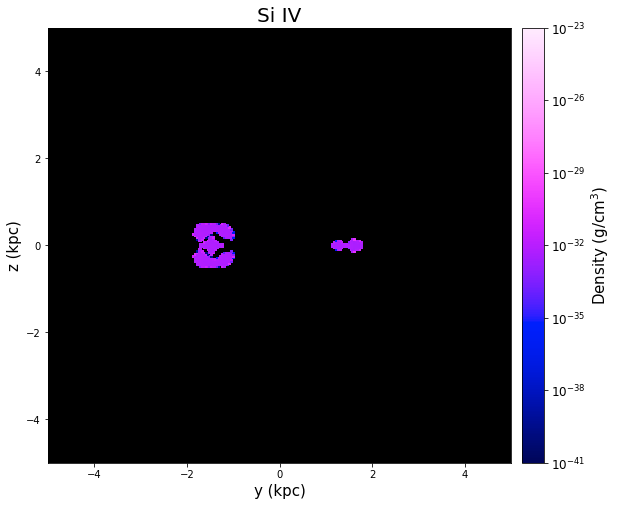

In [67]:
DIY_plots_yz(['Si IV'], 
             ['Si_p3_density'], 20,
             der_field=False)

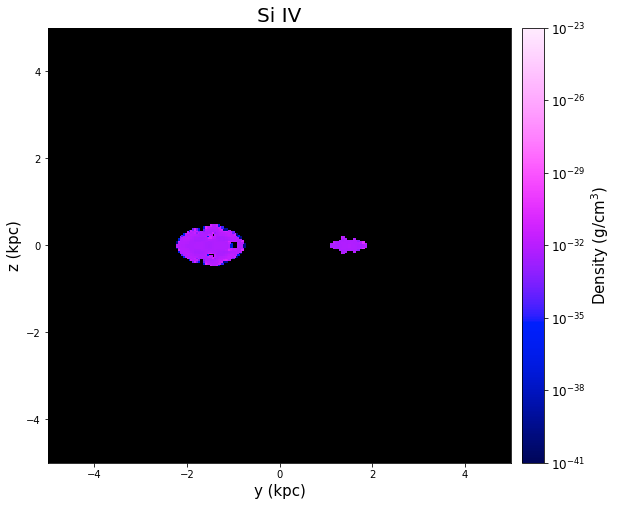

In [70]:
DIY_plots_yz(['Si IV'], 
             ['Si_p3_density'], 30,
             der_field=False)

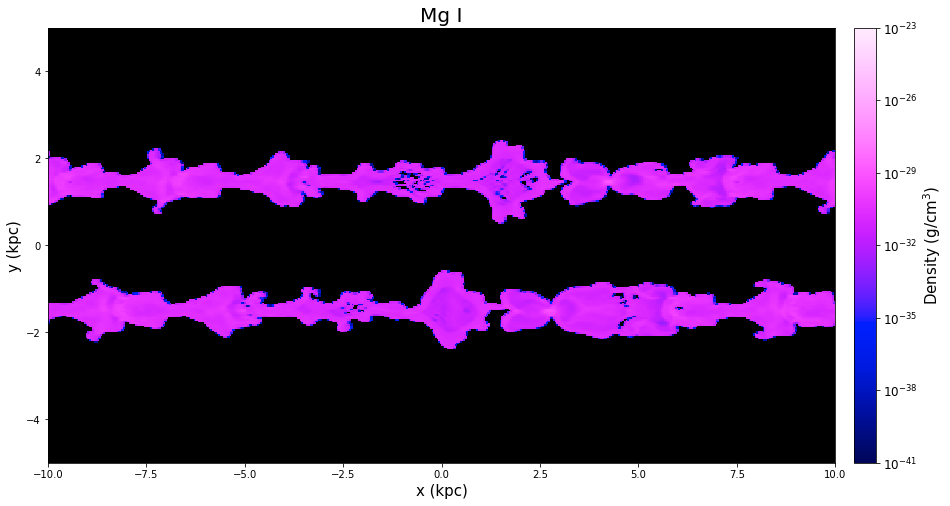

In [62]:
DIY_plots_xy(['Mg I'], 
             ['Mg_p0_density',], add_field=False, der_field=False)

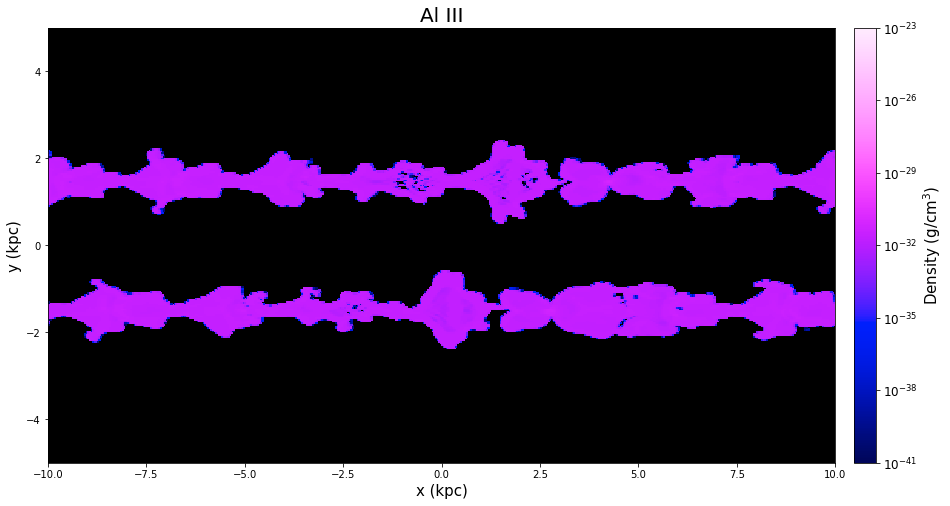

In [52]:
DIY_plots_xy(['Al III'], 
             ['Al_p2_density',], add_field=True, der_field=False)

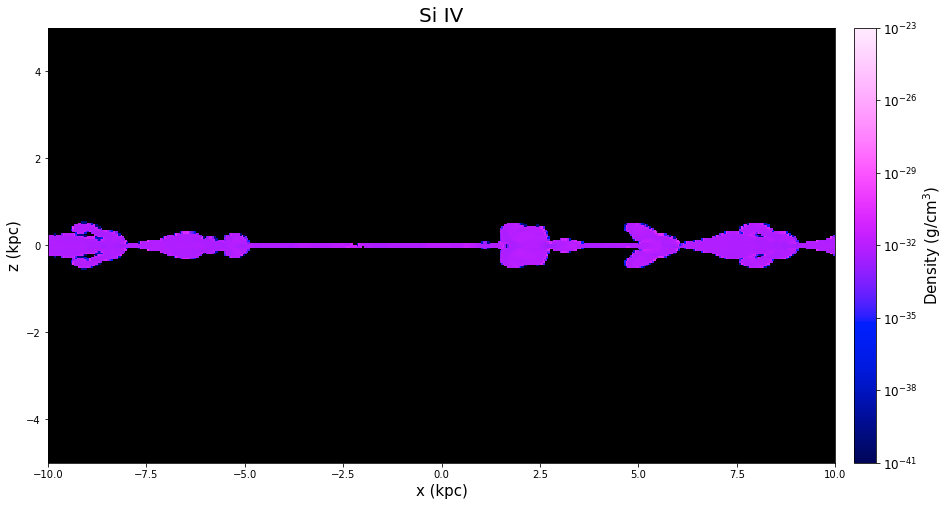

In [88]:
DIY_plots_xz(['Si IV'], 
             ['Si_p3_density'], 90,
             der_field=False)

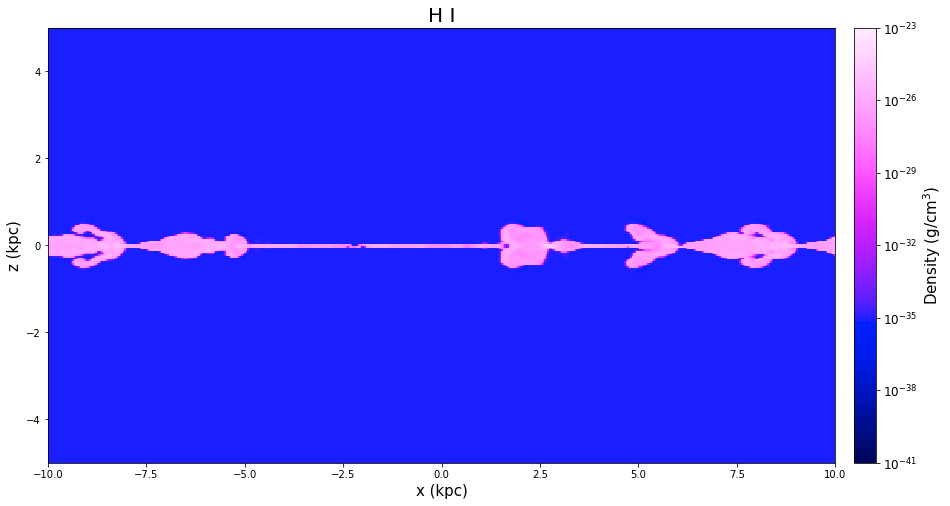

In [87]:
DIY_plots_xz(['H I'], 
             ['H_p0_density'], 90,
             der_field=False)